# Algoritmo para aumentar o SESA para o projeto final de ML

### Parâmetros Iniciais (só precisa mudar essa parte)

ATENÇÃO!

Não precisa criar os diretórios de destino pq o algoritmo cria sozinho caso eles ainda não existam. ENTRETANTO, caso os diretórios de DESTINO já existam, o algoritmo vai apagar tudo que tem lá antes de continuar. C U I D A D O.

Defina os diretórios de origem e destino dos áudios.

In [1]:
diretorioOrigemTreinamento  = "/home/dimi/Downloads/Datasets/SESA/SESA_Original/train/"
diretorioDestinoTreinamento = "/home/dimi/Downloads/Datasets/SESA/SESA_Projeto_Final_ML/train/"

diretorioOrigemTeste        = "/home/dimi/Downloads/Datasets/SESA/SESA_Original/test/"
diretorioDestinoTeste       = "/home/dimi/Downloads/Datasets/SESA/SESA_Projeto_Final_ML/test/"

### Importações

In [2]:
import librosa
import sys
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from joblib import Parallel, delayed

sys.path.append("../python/")
import efeitos

In [3]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'axes.labelsize': 13,
          'axes.titlesize':17, 
          'font.size': 13,
          'legend.fontsize': 13, 
          'xtick.labelsize': 11, 
          'ytick.labelsize': 11
         }
plt.rcParams.update(params)

### Verificando se os diretórios de destino já existem

In [4]:
if os.path.isdir(diretorioDestinoTreinamento) == True:
    shutil.rmtree(diretorioDestinoTreinamento)
if os.path.isdir(diretorioDestinoTeste) == True:
    shutil.rmtree(diretorioDestinoTeste)
    
os.makedirs(diretorioDestinoTreinamento)
os.makedirs(diretorioDestinoTeste)

### Função que aplica os efeitos em um único áudio e salva na pasta de destino

Essa função pega um único áudio do diretório de origem e salva cinco áudios na pasta de destino: 

1) O próprio áudio original

2) O resultado com velocidade de reprodução alterada

3) O resultado com pitch shift

4)  O resultado com deslocamento temporal

5) O resultado com adição de ruído branco

In [5]:
def aumentarDataset(nomeAudio, diretorioOrigem, diretorioDestino):
    
    # ABRINDO O AUDIO
    sinalOriginal, freqAmostragem = librosa.core.load(diretorioOrigem + nomeAudio, sr=None, mono=True)
    
    # NORMALIZANDO PELA ENERGIA
    sinalOriginal = efeitos.normalizarEnergia(sinalOriginal)
    
    # APLICANDO OS EFEITOS
    sinalVelocidade, velocidade = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
    sinalRuido, snr             = efeitos.adicionarRuidoBrancoAleatoriamente(sinalOriginal)
    sinalPitch, pitch           = efeitos.mudarPitchAleatoriamente(sinalOriginal, freqAmostragem)
    sinalTempo, tempo           = efeitos.deslocarTempoAleatoriamente(sinalOriginal)
    
    # SALVANDO NO DESTINO (TEM QUE SALVAR O ORIGINAL TB)
    librosa.output.write_wav(diretorioDestino + nomeAudio[:-4] + "_original.wav", sinalOriginal, freqAmostragem)
    librosa.output.write_wav(diretorioDestino + nomeAudio[:-4] + "_velocidade.wav", sinalVelocidade, freqAmostragem)
    librosa.output.write_wav(diretorioDestino + nomeAudio[:-4] + "_ruido.wav", sinalRuido, freqAmostragem)
    librosa.output.write_wav(diretorioDestino + nomeAudio[:-4] + "_pitch.wav", sinalPitch, freqAmostragem)
    librosa.output.write_wav(diretorioDestino + nomeAudio[:-4] + "_tempo.wav", sinalTempo, freqAmostragem)
    
    # RETORNO OS PARAMETROS DE CADA EFEITO
    return velocidade, snr, pitch, tempo

## Aumentando o dataset de treinamento

In [6]:
arquivosOrigem = np.array(os.listdir(diretorioOrigemTreinamento))

# RODE A LINHA ABAIXO APENAS PARA TESTES RAPIDOS
#arquivosOrigem = arquivosOrigem[:10] # TESTES RAPIDOS

resposta = Parallel(n_jobs=-1, verbose=100)(delayed(aumentarDataset)(arquivoAtual, diretorioOrigemTreinamento, diretorioDestinoTreinamento) for arquivoAtual in arquivosOrigem)
arrayVelocidades, arraySNRs, arrayPitchs, arrayTempos = zip(*resposta)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   30.7s
[Paralle

[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:   57.9s
[Paralle

[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  1.4min
[Paralle

##### Salvando as distribuições de probabilidade

In [7]:
# ABRINDO O ARQUIVO TXT
arquivoResultados = "../resultados/dist_prob.txt"
if os.path.exists(arquivoResultados):
    os.remove(arquivoResultados)
objFile = open(arquivoResultados, "a")

# ESCREVENDO O CABECALHO
objFile.write("TREINAMENTO:")

# ESCREVENDO OS ARRAYS
objFile.write("\nSNRs: ")
for i in arraySNRs:
    objFile.write(str(i) + ", ")    
objFile.write("\nPitchs: ")
for i in arrayPitchs:
    objFile.write(str(i) + ", ")    
objFile.write("\nVelocidades: ")
for i in arrayVelocidades:
    objFile.write(str(i) + ", ")    
objFile.write("\nTempos: ")
for i in arrayTempos:
    objFile.write(str(i) + ", ")    

# FECHANDO
objFile.close()    

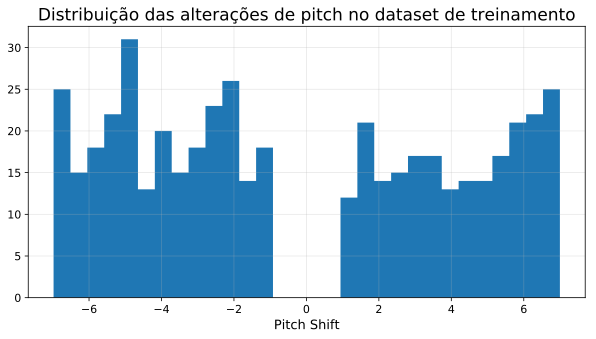

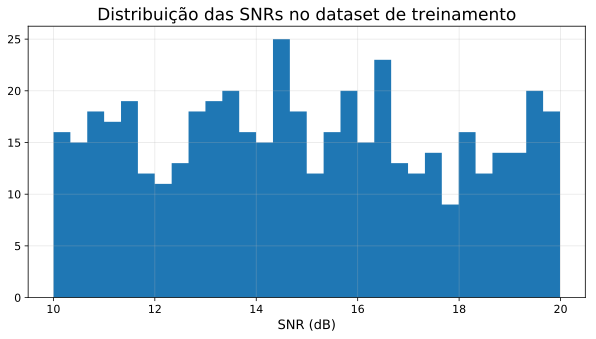

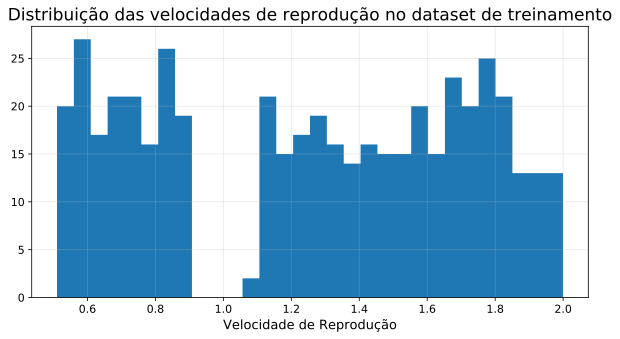

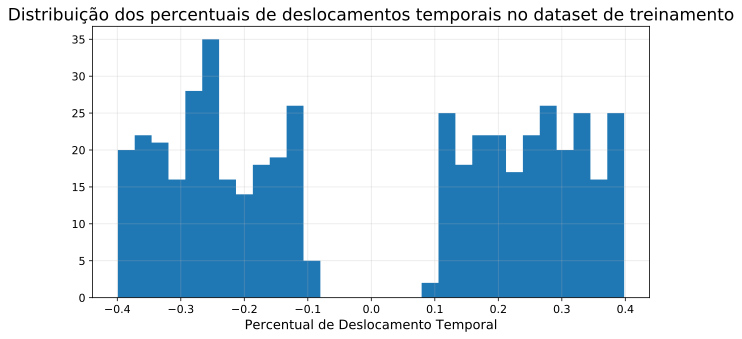

In [8]:
bins = 30

plt.hist(arrayPitchs, bins, histtype="stepfilled")
plt.title("Distribuição das alterações de pitch no dataset de treinamento")
plt.grid(alpha=0.3)
plt.xlabel("Pitch Shift")
plt.savefig("../resultados/distribuicao_treinamento_pitch.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

plt.hist(arraySNRs, bins, histtype="stepfilled")
plt.title("Distribuição das SNRs no dataset de treinamento")
plt.grid(alpha=0.3)
plt.xlabel("SNR (dB)")
plt.savefig("../resultados/distribuicao_treinamento_ruido.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

plt.hist(arrayVelocidades, bins, histtype="stepfilled")
plt.title("Distribuição das velocidades de reprodução no dataset de treinamento")
plt.grid(alpha=0.3)
plt.xlabel("Velocidade de Reprodução")
plt.savefig("../resultados/distribuicao_treinamento_velocidade.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

plt.hist(arrayTempos, bins, histtype="stepfilled")
plt.title("Distribuição dos percentuais de deslocamentos temporais no dataset de treinamento")
plt.grid(alpha=0.3)
plt.xlabel("Percentual de Deslocamento Temporal")
plt.savefig("../resultados/distribuicao_treinamento_tempo.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Aumentando o dataset de teste

In [9]:
arquivosOrigem = np.array(os.listdir(diretorioOrigemTeste))

# RODE A LINHA ABAIXO APENAS PARA TESTES RAPIDOS
#arquivosOrigem = arquivosOrigem[:10] # TESTES RAPIDOS

resposta = Parallel(n_jobs=-1, verbose=100)(delayed(aumentarDataset)(arquivoAtual, diretorioOrigemTeste, diretorioDestinoTeste) for arquivoAtual in arquivosOrigem)
arrayVelocidades, arraySNRs, arrayPitchs, arrayTempos = zip(*resposta)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

##### Salvando as distribuições de probabilidade

In [10]:
# ABRINDO O ARQUIVO TXT
objFile = open(arquivoResultados, "a")

# ESCREVENDO O CABECALHO
objFile.write("\n\nTESTE:")

# ESCREVENDO OS ARRAYS
objFile.write("\nSNRs: ")
for i in arraySNRs:
    objFile.write(str(i) + ", ")    
objFile.write("\nPitchs: ")
for i in arrayPitchs:
    objFile.write(str(i) + ", ")    
objFile.write("\nVelocidades: ")
for i in arrayVelocidades:
    objFile.write(str(i) + ", ")    
objFile.write("\nTempos: ")
for i in arrayTempos:
    objFile.write(str(i) + ", ")    

# FECHANDO
objFile.close()    

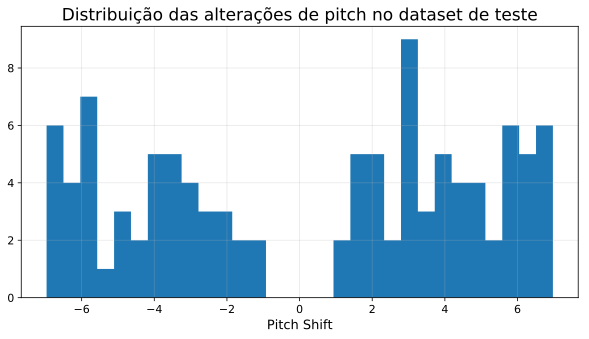

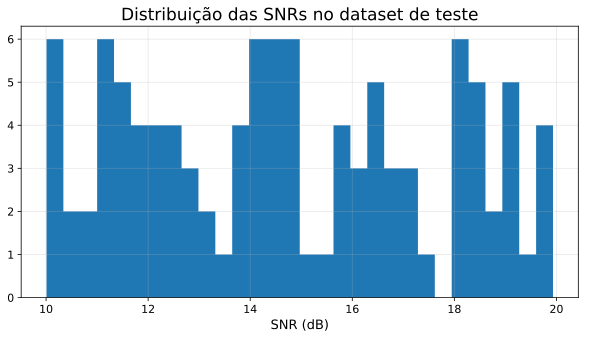

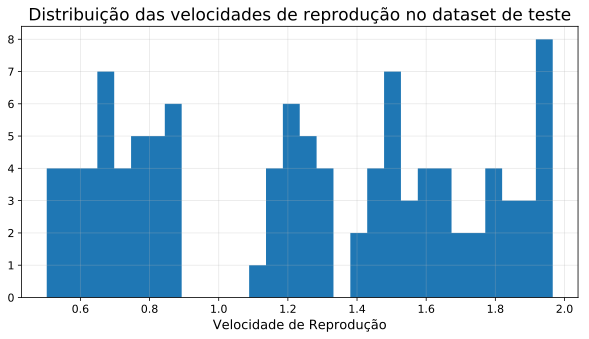

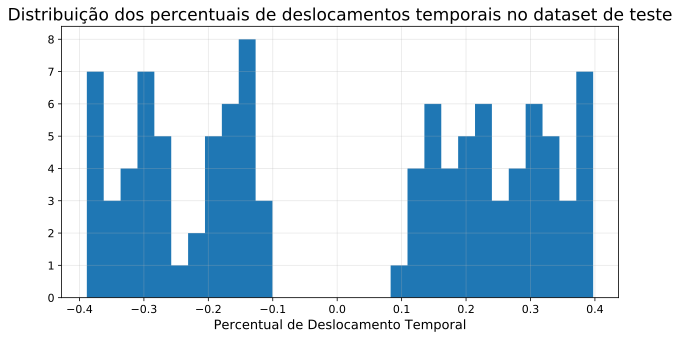

In [11]:
bins = 30

plt.hist(arrayPitchs, bins, histtype="stepfilled")
plt.title("Distribuição das alterações de pitch no dataset de teste")
plt.grid(alpha=0.3)
plt.xlabel("Pitch Shift")
plt.savefig("../resultados/distribuicao_teste_pitch.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

plt.hist(arraySNRs, bins, histtype="stepfilled")
plt.title("Distribuição das SNRs no dataset de teste")
plt.grid(alpha=0.3)
plt.xlabel("SNR (dB)")
plt.savefig("../resultados/distribuicao_teste_ruido.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

plt.hist(arrayVelocidades, bins, histtype="stepfilled")
plt.title("Distribuição das velocidades de reprodução no dataset de teste")
plt.grid(alpha=0.3)
plt.xlabel("Velocidade de Reprodução")
plt.savefig("../resultados/distribuicao_teste_velocidade.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

plt.hist(arrayTempos, bins, histtype="stepfilled")
plt.title("Distribuição dos percentuais de deslocamentos temporais no dataset de teste")
plt.grid(alpha=0.3)
plt.xlabel("Percentual de Deslocamento Temporal")
plt.savefig("../resultados/distribuicao_teste_tempo.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

### Função antiga que misturava os efeitos

Cada áudio na origem vai gerar oito áudios no destino:

1) Original

2) Com deslocamento temporal

3) Com mudança de pitch

4) Com adição de ruído branco

5) Com alteração na velocidade de reprodução

6) Com dois efeitos misturados (selecionados aleatoriamente)

7) Com três efeitos misturados (selecionados aleatoriamente)

8) Com todos os efeitos

In [12]:
# def aumentarDatasetTeste(nomeAudioTeste, diretorioOrigem, diretorioDestino):
    
#     # ABRINDO O AUDIO
#     sinalOriginal, freqAmostragem = librosa.core.load(diretorioOrigem + nomeAudioTeste, sr=None, mono=True)
    
#     # NORMALIZANDO PELA ENERGIA
#     sinalOriginal = efeitos.normalizarEnergia(sinalOriginal)
    
#     # APLICANDO OS EFEITOS SINGULARES
#     sinalVelocidade, __ = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
#     sinalRuido, __      = efeitos.adicionarRuidoBrancoAleatoriamente(sinalOriginal)
#     sinalPitch, __      = efeitos.mudarPitchAleatoriamente(sinalOriginal, freqAmostragem)
#     sinalTempo, __      = efeitos.deslocarTempoAleatoriamente(sinalOriginal)
#     librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_original.wav", sinalOriginal, freqAmostragem)
#     librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_velocidade.wav", sinalVelocidade, freqAmostragem)
#     librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_ruido.wav", sinalRuido, freqAmostragem)
#     librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_pitch.wav", sinalPitch, freqAmostragem)
#     librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_tempo.wav", sinalTempo, freqAmostragem)
    
#     # APLICANDO DOIS EFEITOS
#     escolha = np.random.randint(0, 6)    
#     if escolha == 0: # efeitos == [1,2]
#         print("Entrou em 0")
#         sinalDois, __ = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
#         sinalDois, __ = efeitos.adicionarRuidoBrancoAleatoriamente(sinalDois)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_velocidade_ruido.wav", sinalDois, freqAmostragem)
#     elif escolha == 1: # efeitos == [1,3]
#         print("Entrou em 1")
#         sinalDois, __ = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
#         sinalDois, __ = efeitos.mudarPitchAleatoriamente(sinalDois, freqAmostragem)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_velocidade_pitch.wav", sinalDois, freqAmostragem)
#     elif escolha == 2: # efeitos == [1,4]
#         print("Entrou em 2")
#         sinalDois, __ = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
#         sinalDois, __ = efeitos.deslocarTempoAleatoriamente(sinalDois)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_velocidade_tempo.wav", sinalDois, freqAmostragem)
#     elif escolha == 3: # efeitos == [2,3]
#         print("Entrou em 3")
#         sinalDois, __ = efeitos.adicionarRuidoBrancoAleatoriamente(sinalOriginal)
#         sinalDois, __ = efeitos.mudarPitchAleatoriamente(sinalDois, freqAmostragem)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_ruido_pitch.wav", sinalDois, freqAmostragem)
#     elif escolha == 4: # efeitos == [2,4]
#         print("Entrou em 4")
#         sinalDois, __ = efeitos.adicionarRuidoBrancoAleatoriamente(sinalOriginal)
#         sinalDois, __ = efeitos.deslocarTempoAleatoriamente(sinalDois)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_ruido_tempo.wav", sinalDois, freqAmostragem)
#     else: # efeitos == [3,4]
#         print("Entrou no else")
#         sinalDois, __ = efeitos.mudarPitchAleatoriamente(sinalOriginal, freqAmostragem)
#         sinalDois, __ = efeitos.deslocarTempoAleatoriamente(sinalDois)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_pitch_tempo.wav", sinalDois, freqAmostragem)
    
#     # APLICANDO TRES EFEITOS
#     escolha = np.random.randint(0, 4)
#     if escolha == 0: # efeitos == [1,2,3]
#         sinalTres, __ = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
#         sinalTres, __ = efeitos.adicionarRuidoBrancoAleatoriamente(sinalTres)
#         sinalTres, __ = efeitos.mudarPitchAleatoriamente(sinalTres, freqAmostragem)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_velocidade_ruido_pitch.wav", sinalTres, freqAmostragem)
#     elif escolha == 1: # efeitos == [1,2,4]
#         sinalTres, __ = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
#         sinalTres, __ = efeitos.adicionarRuidoBrancoAleatoriamente(sinalTres)
#         sinalTres, __ = efeitos.deslocarTempoAleatoriamente(sinalTres)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_velocidade_ruido_tempo.wav", sinalTres, freqAmostragem)
#     elif escolha == 2: # efeitos == [1,3,4]
#         sinalTres, __ = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
#         sinalTres, __ = efeitos.mudarPitchAleatoriamente(sinalTres, freqAmostragem)
#         sinalTres, __ = efeitos.deslocarTempoAleatoriamente(sinalTres)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_velocidade_pitch_tempo.wav", sinalTres, freqAmostragem)
#     else: # efeitos == [2,3,4]
#         sinalTres, __ = efeitos.adicionarRuidoBrancoAleatoriamente(sinalOriginal)
#         sinalTres, __ = efeitos.mudarPitchAleatoriamente(sinalTres, freqAmostragem)
#         sinalTres, __ = efeitos.deslocarTempoAleatoriamente(sinalTres)
#         librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_ruido_pitch_tempo.wav", sinalTres, freqAmostragem)
    
#     # APLICANDO TODOS OS EFEITOS
#     sinalTodos, __ = efeitos.alterarVelocidadeAleatoriamente(sinalOriginal)
#     sinalTodos, __ = efeitos.adicionarRuidoBrancoAleatoriamente(sinalTodos)
#     sinalTodos, __ = efeitos.mudarPitchAleatoriamente(sinalTodos, freqAmostragem)
#     sinalTodos, __ = efeitos.deslocarTempoAleatoriamente(sinalTodos)
#     librosa.output.write_wav(diretorioDestino + nomeAudioTeste[:-4] + "_velocidade_ruido_pitch_tempo.wav", sinalTodos, freqAmostragem)  